# Import Libraries 

In [1]:
import pandas as pd 
import numpy as np 
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline  
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics

# Import dataset 

In [2]:
data = pd.read_csv("/home/western/Documents/data/Train.csv")
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


## Resampling 

In [3]:
# Random sampling 
df = data.sample(n=7000, random_state=42).reset_index(drop=True)

# First 10000 rows
#df = df.head(10000)

df.head(7)

,text,label
0,The central theme in this movie seems to be co...,0
1,"An excellent example of ""cowboy noir"", as it's...",1
2,The ending made my heart jump up into my throa...,0
3,Only the chosen ones will appreciate the quali...,1
4,"This is a really funny film, especially the se...",1
5,"Sure, we all like bad movies at one time or an...",0
6,"Why?!! This was an insipid, uninspired and emb...",0


In [4]:
df.tail()

,text,label
6995,I still wonder why I watched this movie. Admit...,1
6996,What to say about a movie like Rock Star? A lo...,1
6997,"Though ""The Sopranos"" is yet another gift from...",1
6998,On Halloween a town is terrorized by a lunatic...,0
6999,"Licence fees to watch this trash, And pay for ...",0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7000 non-null   object
 1   label   7000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 109.5+ KB


In [6]:
df.describe(include="O").T

,count,unique,top,freq
text,7000,6988,This show comes up with interesting locations ...,2


## Class distribution 

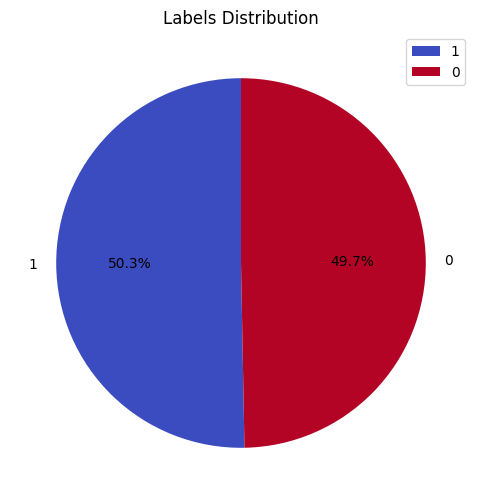

In [7]:
# Count occurrences of each category in 'booking_status'
labels = df['label'].value_counts()

# Plot as a pie chart
plt.figure(figsize=(6, 6))  # Set figure size
labels.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='coolwarm', legend=True)

# Customize labels and title
plt.ylabel('')  # Remove y-axis label for clarity
plt.title('Labels Distribution')

# Show the plot
plt.show()

In [8]:
# #Adding a column of numbers of charachters,words and sentences in each msg
# df["No_of_Characters"] = df["text"].apply(len)
# df["No_of_Words"]=df.apply(lambda row: nltk.word_tokenize(row["text"]), axis=1).apply(len)
# df["No_of_sentence"]=df.apply(lambda row: nltk.sent_tokenize(row["text"]), axis=1).apply(len)

# data.describe().T

# Data Cleaning 

In [9]:
df.duplicated().sum()

np.int64(12)

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6988 entries, 0 to 6998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6988 non-null   object
 1   label   6988 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 163.8+ KB


# Text Preprocessing 

In [13]:
import re  
import string  

def clean_text(text):  
    '''Make text lowercase, remove text in square brackets, remove links, remove punctuation,  
    and remove words containing numbers.'''  
    text = str(text).lower()  
    text = re.sub(r'\[.*?\]', '', text)  
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  
    text = re.sub(r'<.*?>+', '', text)  
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  
    text = re.sub(r'\n', '', text)  
    text = re.sub(r'\w*\d\w*', '', text)  
    return text  

In [14]:
# Apply the function
df['text_clean'] = df['text'].apply(clean_text)  

# Display the first 10rows  
df.head(10)

,text,label,text_clean
0,The central theme in this movie seems to be co...,0,the central theme in this movie seems to be co...
1,"An excellent example of ""cowboy noir"", as it's...",1,an excellent example of cowboy noir as its bee...
2,The ending made my heart jump up into my throa...,0,the ending made my heart jump up into my throa...
3,Only the chosen ones will appreciate the quali...,1,only the chosen ones will appreciate the quali...
4,"This is a really funny film, especially the se...",1,this is a really funny film especially the sec...
5,"Sure, we all like bad movies at one time or an...",0,sure we all like bad movies at one time or ano...
6,"Why?!! This was an insipid, uninspired and emb...",0,why this was an insipid uninspired and embarra...
7,This is one of those movies that has everythin...,1,this is one of those movies that has everythin...
8,i saw this film over 20 years ago and still re...,1,i saw this film over years ago and still reme...
9,This true story of Carlson's Raiders is more o...,0,this true story of carlsons raiders is more of...


In [15]:
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/western/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/western/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/western/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Try with spacy

## Tokenization 

In [16]:
df['tokens'] = df['text_clean'].apply(word_tokenize)
df.head()


,text,label,text_clean,tokens
0,The central theme in this movie seems to be co...,0,the central theme in this movie seems to be co...,"[the, central, theme, in, this, movie, seems, ..."
1,"An excellent example of ""cowboy noir"", as it's...",1,an excellent example of cowboy noir as its bee...,"[an, excellent, example, of, cowboy, noir, as,..."
2,The ending made my heart jump up into my throa...,0,the ending made my heart jump up into my throa...,"[the, ending, made, my, heart, jump, up, into,..."
3,Only the chosen ones will appreciate the quali...,1,only the chosen ones will appreciate the quali...,"[only, the, chosen, ones, will, appreciate, th..."
4,"This is a really funny film, especially the se...",1,this is a really funny film especially the sec...,"[this, is, a, really, funny, film, especially,..."


## Stop words removal 

In [17]:
stop_words = set(stopwords.words('english'))
stop_words.update(['u', 'im', 'c', 'i'])  # Add custom stopwords

df['tokens_no_stopwords'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])
df.head()


,text,label,text_clean,tokens,tokens_no_stopwords
0,The central theme in this movie seems to be co...,0,the central theme in this movie seems to be co...,"[the, central, theme, in, this, movie, seems, ...","[central, theme, movie, seems, confusion, rela..."
1,"An excellent example of ""cowboy noir"", as it's...",1,an excellent example of cowboy noir as its bee...,"[an, excellent, example, of, cowboy, noir, as,...","[excellent, example, cowboy, noir, called, une..."
2,The ending made my heart jump up into my throa...,0,the ending made my heart jump up into my throa...,"[the, ending, made, my, heart, jump, up, into,...","[ending, made, heart, jump, throat, proceeded,..."
3,Only the chosen ones will appreciate the quali...,1,only the chosen ones will appreciate the quali...,"[only, the, chosen, ones, will, appreciate, th...","[chosen, ones, appreciate, quality, story, cha..."
4,"This is a really funny film, especially the se...",1,this is a really funny film especially the sec...,"[this, is, a, really, funny, film, especially,...","[really, funny, film, especially, second, thir..."


## Lemmatization 

In [18]:
lemmatizer = WordNetLemmatizer()

df['lemmatized'] = df['tokens_no_stopwords'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
df['lemmatized_text'] = df['lemmatized'].apply(lambda tokens: ' '.join(tokens))  # Convert tokens back to text

df.head(7)


,text,label,text_clean,tokens,tokens_no_stopwords,lemmatized,lemmatized_text
0,The central theme in this movie seems to be co...,0,the central theme in this movie seems to be co...,"[the, central, theme, in, this, movie, seems, ...","[central, theme, movie, seems, confusion, rela...","[central, theme, movie, seems, confusion, rela...",central theme movie seems confusion relationsh...
1,"An excellent example of ""cowboy noir"", as it's...",1,an excellent example of cowboy noir as its bee...,"[an, excellent, example, of, cowboy, noir, as,...","[excellent, example, cowboy, noir, called, une...","[excellent, example, cowboy, noir, called, une...",excellent example cowboy noir called unemploye...
2,The ending made my heart jump up into my throa...,0,the ending made my heart jump up into my throa...,"[the, ending, made, my, heart, jump, up, into,...","[ending, made, heart, jump, throat, proceeded,...","[ending, made, heart, jump, throat, proceeded,...",ending made heart jump throat proceeded leave ...
3,Only the chosen ones will appreciate the quali...,1,only the chosen ones will appreciate the quali...,"[only, the, chosen, ones, will, appreciate, th...","[chosen, ones, appreciate, quality, story, cha...","[chosen, one, appreciate, quality, story, char...",chosen one appreciate quality story character ...
4,"This is a really funny film, especially the se...",1,this is a really funny film especially the sec...,"[this, is, a, really, funny, film, especially,...","[really, funny, film, especially, second, thir...","[really, funny, film, especially, second, thir...",really funny film especially second third four...
5,"Sure, we all like bad movies at one time or an...",0,sure we all like bad movies at one time or ano...,"[sure, we, all, like, bad, movies, at, one, ti...","[sure, like, bad, movies, one, time, another, ...","[sure, like, bad, movie, one, time, another, f...",sure like bad movie one time another fact enjo...
6,"Why?!! This was an insipid, uninspired and emb...",0,why this was an insipid uninspired and embarra...,"[why, this, was, an, insipid, uninspired, and,...","[insipid, uninspired, embarrassing, film, emba...","[insipid, uninspired, embarrassing, film, emba...",insipid uninspired embarrassing film embarrass...


In [19]:
df.columns

Index(['text', 'label', 'text_clean', 'tokens', 'tokens_no_stopwords',
       'lemmatized', 'lemmatized_text'],
      dtype='object')

## Word Cloud 

### Define target and independent features

In [20]:

# # Define the features 
# df = df.dropna()
# # Defining the dependent variables/features
# X = df.drop(columns=['text', 'label', 'text_clean', 'tokens', 'tokens_no_stopwords',
#        'lemmatized'])
# # Target variable 
# y = df['label']

# Ensure no missing values
df = df.dropna()

# Use only the text column for TF-IDF vectorization
X = df['lemmatized_text']  # Use lemmatized text for TF-IDF
y = df['label']  # Target variable


In [21]:
X

0       central theme movie seems confusion relationsh...
1       excellent example cowboy noir called unemploye...
2       ending made heart jump throat proceeded leave ...
3       chosen one appreciate quality story character ...
4       really funny film especially second third four...
                              ...                        
6994    wallace gromit main character best cartoon eve...
6995    still wonder watched movie admittedly viewed f...
6996    say movie like rock star lot actually type mov...
6997    though soprano yet another gift megahit godfat...
6998    halloween town terrorized lunatic big pumpkin ...
Name: lemmatized_text, Length: 6988, dtype: object

In [22]:
y

0       0
1       1
2       0
3       1
4       1
       ..
6994    1
6995    1
6996    1
6997    1
6998    0
Name: label, Length: 6988, dtype: int64

### Split into training and testing 

In [23]:
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
X_train

694     ok maybe north east scotland talk like guy fil...
2691    time u everything possible film came roughies ...
3569    wrong people werent blown away action car sequ...
4151    man wonder hunky coworker gay yard sale find r...
4088    saw film london cinema seen since found hilari...
                              ...                        
1308    alexandra ripley wrote horrible sequel margare...
2345    film reveals unease modern men woman life conf...
3657    seldom see short comment written imdb filmgoer...
1301    strangely enough movie never made big screen d...
129     saw video year ago would love see dvd good fil...
Name: lemmatized_text, Length: 5590, dtype: object

In [25]:
X_test

5543    everything film tried done better superbly run...
4166    beginning movie give feeling director trying p...
6449    first movie longtime friend john belushis deat...
2752    cryptozoologist capture mythical chupacabra ca...
9       true story carlsons raider army training film ...
                              ...                        
4588    show typical character comedy good guy idiot p...
263     young couple road minding business casual sex ...
1978    oh dear oh dear started watching knowing expec...
6000    film rated scale one would need create new rat...
1575    film one finest american bmovies youre looking...
Name: lemmatized_text, Length: 1398, dtype: object

In [26]:
y_train

694     1
2691    0
3569    1
4151    0
4088    1
       ..
1308    0
2345    1
3657    1
1301    1
129     1
Name: label, Length: 5590, dtype: int64

In [27]:
y_test

5543    0
4166    0
6449    0
2752    0
9       0
       ..
4588    1
263     0
1978    0
6000    0
1575    1
Name: label, Length: 1398, dtype: int64

## Vectorization 

In [28]:
# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=7500)

# Fit & transform training data
X_train_tfidf = vectorizer.fit_transform(X_train)  # Fit & transform training data

# Transform test data (DO NOT fit again to avoid data leakage)
X_test_tfidf = vectorizer.transform(X_test)  # Transform test data (no fitting!)



In [29]:
# Check shapes to confirm they match
print(f"X_train_tfidf shape: {X_train_tfidf.shape}, y_train shape: {y_train.shape}")
print(f"X_test_tfidf shape: {X_test_tfidf.shape}, y_test shape: {y_test.shape}")


X_train_tfidf shape: (5590, 7500), y_train shape: (5590,)
X_test_tfidf shape: (1398, 7500), y_test shape: (1398,)


In [38]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naïve Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)  # Train model
    y_pred = model.predict(X_test_tfidf)  # Predict on test set

    print(f"\n🔹 Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))



🔹 Model: Logistic Regression
Accuracy: 0.8541
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       694
           1       0.84      0.88      0.86       704

    accuracy                           0.85      1398
   macro avg       0.86      0.85      0.85      1398
weighted avg       0.85      0.85      0.85      1398

[[574 120]
 [ 84 620]]

🔹 Model: Naïve Bayes
Accuracy: 0.8362
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       694
           1       0.84      0.84      0.84       704

    accuracy                           0.84      1398
   macro avg       0.84      0.84      0.84      1398
weighted avg       0.84      0.84      0.84      1398

[[581 113]
 [116 588]]

🔹 Model: Random Forest
Accuracy: 0.8276
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       694
           1       0.84      0.82      0.83       704

    accur

# Deep learning models 

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

# Convert TF-IDF sparse matrix to dense arrays
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

# Encode labels (Ensuring Binary Format)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # Already 0s and 1s
y_test_encoded = le.transform(y_test)

# Define input shape
input_shape = X_train_dense.shape[1]

# Check unique labels (should be [0, 1])
print("Unique labels:", set(y_train_encoded))


2025-03-22 20:20:01.675484: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-22 20:20:01.680543: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-22 20:20:01.692809: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742664001.712503   10740 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742664001.718298   10740 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742664001.732052   10740 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Unique labels: {np.int64(0), np.int64(1)}


In [37]:
# Build LSTM Model for Binary Classification
lstm_model = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,)),  
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile model
lstm_model.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

# Train model
lstm_model.fit(X_train_dense, y_train_encoded, epochs=10, batch_size=128, validation_data=(X_test_dense, y_test_encoded))

# Evaluate model
test_loss, test_acc = lstm_model.evaluate(X_test_dense, y_test_encoded)
print(f"\nLSTM Test Accuracy: {test_acc:.4f}")


/home/western/anaconda3/envs/nlpenv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6136 - loss: 0.6807 - val_accuracy: 0.8491 - val_loss: 0.5866
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8556 - loss: 0.5187 - val_accuracy: 0.8419 - val_loss: 0.3935
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9127 - loss: 0.2968 - val_accuracy: 0.8584 - val_loss: 0.3261
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9584 - loss: 0.1744 - val_accuracy: 0.8591 - val_loss: 0.3243
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9698 - loss: 0.1222 - val_accuracy: 0.8534 - val_loss: 0.3442
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9880 - loss: 0.0758 - val_accuracy: 0.8505 - val_loss: 0.3738
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9893 - loss: 0.0568 - val_accuracy: 0.8484 - val_loss: 0.4008
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9970 - loss: 0.0349 - val_accuracy: 0.8426 - v

In [34]:
# Build LSTM Model for Binary Classification
lstm_model = Sequential([
    Dense(512, activation='relu', input_shape=(input_shape,)),  
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile model
lstm_model.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

# Train model
lstm_model.fit(X_train_dense, y_train_encoded, epochs=10, batch_size=64, validation_data=(X_test_dense, y_test_encoded))

# Evaluate model
test_loss, test_acc = lstm_model.evaluate(X_test_dense, y_test_encoded)
print(f"\nLSTM Test Accuracy: {test_acc:.4f}")


/home/western/anaconda3/envs/nlpenv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.6840 - loss: 0.5781 - val_accuracy: 0.8512 - val_loss: 0.3479
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.9514 - loss: 0.1402 - val_accuracy: 0.8433 - val_loss: 0.3949
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.9928 - loss: 0.0378 - val_accuracy: 0.8319 - val_loss: 0.5652
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.9986 - loss: 0.0073 - val_accuracy: 0.8362 - val_loss: 0.6455
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.8355 - val_loss: 0.7043
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 1.0000 - loss: 7.8289e-04 - val_accuracy: 0.8355 - val_loss: 0.7446
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 1.0000 - loss: 4.4670e-04 - val_accuracy: 0.8348 - val_loss: 0.7772
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 1.0000 - loss: 2.8383e-04 - val_accuracy

Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 1.0000 - loss: 1.3823e-04 - val_accuracy: 0.8340 - val_loss: 0.8682
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 1.0000 - loss: 1.2361e-04 - val_accuracy: 0.8333 - val_loss: 0.8877
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 1.0000 - loss: 9.1219e-05 - val_accuracy: 0.8326 - val_loss: 0.9053
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 1.0000 - loss: 6.8483e-05 - val_accuracy: 0.8340 - val_loss: 0.9199
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 1.0000 - loss: 5.7676e-05 - val_accuracy: 0.8333 - val_loss: 0.9342
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 1.0000 - loss: 5.3032e-05 - val_accuracy: 0.8340 - val_loss: 0.9485
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 1.0000 - loss: 4.6154e-05 - val_accuracy: 0.8348 - val_loss: 0.9624
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 1.0000 - loss: 3.750

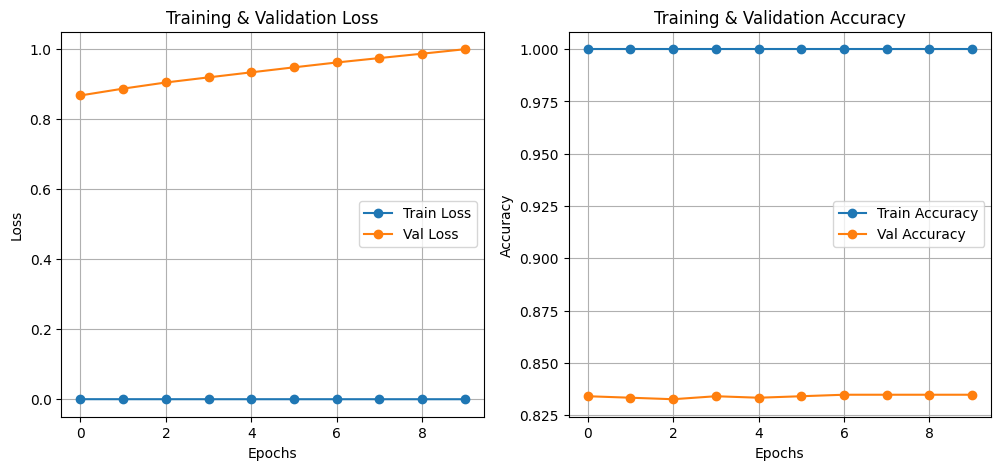

In [35]:
import matplotlib.pyplot as plt

# Train the model and store history
history = lstm_model.fit(
    X_train_dense, y_train_encoded,
    epochs=10,
    batch_size=64,
    validation_data=(X_test_dense, y_test_encoded)
)

# Plot Training & Validation Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.grid()

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid()

plt.show()
